* candidates: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/158/25
* See tql in seidan/Yu2018sector6 
* candidates in [gslides](https://docs.google.com/presentation/d/12lWhQKs1iTrabLjGhu7tOk9GqA48xR9Noc16OjCcDrg/edit#slide=id.g9091e50287_0_0)

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [26]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

In [4]:
tables = Vizier.get_catalogs("J/AJ/158/25")
tables

TableList with 1 tables:
	'0:J/AJ/158/25/table2' with 8 column(s) and 288 row(s) 

In [9]:
df = tables[0].to_pandas()
df

,TIC,Tmag,Per,_tab1_4,Dur,Depth,Tri,Vet
0,363914762,10.931,13.862950,1445.332277,6.57,7490,0.894,0.935
1,318063607,11.591,1.972508,1470.574615,3.98,6900,0.994,0.930
2,72556406,10.763,5.564581,1470.665685,5.36,3590,0.976,0.926
3,375144153,11.611,3.349557,1328.947672,3.20,1370,0.989,0.913
4,238920875,11.740,6.534533,1326.067219,3.70,6610,0.935,0.911
...,...,...,...,...,...,...,...,...
283,375032908,9.328,8.518659,1333.616043,3.21,530,0.260,0.110
284,143218704,11.692,1.857112,1469.812388,5.55,30850,0.997,0.106
285,317876382,10.966,2.150539,1470.621890,4.18,950,0.774,0.104
286,382068562,11.293,12.129942,1330.347472,2.15,16680,0.959,0.102


In [6]:
tois = cr.get_tois()
ctois = cr.get_ctois()

In [7]:
tois['TIC ID'].isin(df.TIC).sum()

41

In [8]:
ctois['TIC ID'].isin(df.TIC).sum()

22

Text(0.5, 1.0, 'Yu+2019 Sector 6 PC')

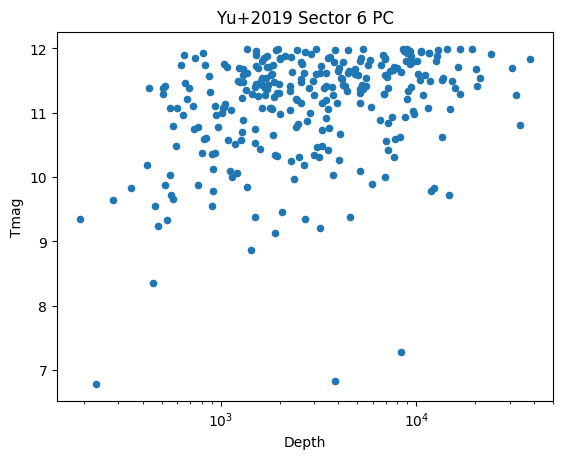

In [9]:
ax = df.plot.scatter(x='Depth', y='Tmag')
ax.set_xscale('log')
ax.set_title('Yu+2019 Sector 6 PC')

In [10]:
df[df.Depth>1000].shape[0]/df.shape[0]

0.8368055555555556

In [11]:
#not in TOI
idx = df.TIC.isin(tois['TIC ID'])
df[~idx][df[~idx].Depth>1000].shape[0]/df.shape[0]

0.7326388888888888

In [24]:
idx1 = df.TIC.isin(tois['TIC ID'])
idx2 = df.TIC.isin(ctois['TIC ID'])
idx3 = df.Depth>1000

tics = df[~idx1 & ~idx2 & idx3].TIC.tolist()

## cluster search

In [ ]:
from tqdm import tqdm

members = {}
for tic in tqdm(df.TIC):
    try:
        t = cr.Target(ticid=tic, verbose=False)
        c = t.get_cluster_membership()
        if c is not None:
            members[tic] = c
    except:
        pass



  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 1/288 [00:12<1:01:01, 12.76s/it]

Target not likely a cluster member




  1%|          | 2/288 [00:20<53:08, 11.15s/it]  

Target not likely a cluster member




  1%|          | 3/288 [00:28<49:16, 10.37s/it]

Target not likely a cluster member




  1%|▏         | 4/288 [00:44<57:15, 12.10s/it]

Target not likely a cluster member




  2%|▏         | 5/288 [01:01<1:02:50, 13.32s/it]

Target not likely a cluster member




  2%|▏         | 6/288 [01:11<59:12, 12.60s/it]  

Target not likely a cluster member
astrometric_excess_noise_sig>4036.09 (>5 hints binarity).

astrometric_gof_al>171.08 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





  2%|▏         | 7/288 [01:34<1:13:25, 15.68s/it]

Target not likely a cluster member




  3%|▎         | 8/288 [01:43<1:02:58, 13.50s/it]

Target not likely a cluster member




  3%|▎         | 9/288 [02:00<1:07:41, 14.56s/it]

Target not likely a cluster member




  3%|▎         | 10/288 [02:18<1:12:36, 15.67s/it]

Target not likely a cluster member




  4%|▍         | 11/288 [02:35<1:13:50, 16.00s/it]

Target not likely a cluster member




  4%|▍         | 12/288 [02:37<54:15, 11.80s/it]  

  5%|▍         | 13/288 [03:03<1:13:43, 16.08s/it]

Target not likely a cluster member




  5%|▍         | 14/288 [03:27<1:23:57, 18.38s/it]

Target not likely a cluster member




  5%|▌         | 15/288 [03:57<1:39:54, 21.96s/it]

Target not likely a cluster member




  6%|▌         | 16/288 [04:25<1:47:36, 23.74s/it]

Target not likely a cluster member




  6%|▌         | 17/288 [04:49<1:48:11, 23.95s/it]

Target not likely a cluster member




  6%|▋         | 18/288 [05:38<2:21:46, 31.51s/it]

Target not likely a cluster member




  7%|▋         | 19/288 [06:06<2:16:07, 30.36s/it]

Target not likely a cluster member




  7%|▋         | 20/288 [06:41<2:21:42, 31.72s/it]

Target not likely a cluster member




  7%|▋         | 21/288 [06:54<1:55:57, 26.06s/it]

  8%|▊         | 22/288 [07:15<1:49:31, 24.70s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>2610.09 (>5 hints binarity).

astrometric_gof_al>245.29 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





  8%|▊         | 23/288 [07:44<1:53:57, 25.80s/it]

Target not likely a cluster member




  8%|▊         | 24/288 [08:19<2:06:07, 28.66s/it]

Target not likely a cluster member




  9%|▊         | 25/288 [08:48<2:06:19, 28.82s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>45.19 (>5 hints binarity).

astrometric_gof_al>38.41 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





  9%|▉         | 26/288 [09:20<2:09:12, 29.59s/it]

Target not likely a cluster member




  9%|▉         | 27/288 [09:45<2:03:40, 28.43s/it]

Target not likely a cluster member




 10%|▉         | 28/288 [10:08<1:55:52, 26.74s/it]

Target not likely a cluster member




 10%|█         | 29/288 [10:34<1:54:55, 26.62s/it]

Target not likely a cluster member




 10%|█         | 30/288 [10:54<1:45:15, 24.48s/it]

Target not likely a cluster member
astrometric_gof_al>20.07 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





 11%|█         | 31/288 [11:17<1:43:34, 24.18s/it]

Target not likely a cluster member
There are 2 gaia sources within 3.0 arcsec.




 11%|█         | 32/288 [11:39<1:39:14, 23.26s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>5.77 (>5 hints binarity).

See https://arxiv.org/pdf/1804.11082.pdf





 11%|█▏        | 33/288 [12:13<1:52:33, 26.48s/it]

 12%|█▏        | 34/288 [12:37<1:49:26, 25.85s/it]

Target not likely a cluster member




 12%|█▏        | 35/288 [13:05<1:52:25, 26.66s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>5.41 (>5 hints binarity).

See https://arxiv.org/pdf/1804.11082.pdf





 12%|█▎        | 36/288 [13:34<1:54:39, 27.30s/it]

Target not likely a cluster member
There are 2 gaia sources within 3.0 arcsec.




 13%|█▎        | 37/288 [14:02<1:54:20, 27.33s/it]

Target not likely a cluster member
Target parallax (-3.8703650839831547 mas) is omitted!
astrometric_excess_noise_sig>3372.77 (>5 hints binarity).

astrometric_gof_al>259.65 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





 13%|█▎        | 38/288 [14:11<1:30:58, 21.83s/it]

Target not likely a cluster member




 14%|█▎        | 39/288 [14:33<1:31:11, 21.97s/it]

Target not likely a cluster member




 14%|█▍        | 40/288 [15:17<1:57:55, 28.53s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>13.79 (>5 hints binarity).

See https://arxiv.org/pdf/1804.11082.pdf





 14%|█▍        | 41/288 [15:39<1:49:49, 26.68s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>16.65 (>5 hints binarity).

astrometric_gof_al>27.47 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





 15%|█▍        | 42/288 [16:12<1:56:39, 28.45s/it]

Target not likely a cluster member




 15%|█▍        | 43/288 [16:52<2:10:54, 32.06s/it]

Target not likely a cluster member
TIC 63571763 is in ASCC_32!




 15%|█▌        | 44/288 [17:47<2:38:08, 38.89s/it]

astrometric_excess_noise_sig>12.68 (>5 hints binarity).

astrometric_gof_al>26.88 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





 16%|█▌        | 45/288 [18:19<2:29:24, 36.89s/it]

Target not likely a cluster member
astrometric_excess_noise_sig>2758.82 (>5 hints binarity).

astrometric_gof_al>191.10 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf





 16%|█▌        | 46/288 [19:02<2:35:51, 38.64s/it]

Target not likely a cluster member




 16%|█▋        | 47/288 [19:29<2:21:35, 35.25s/it]

Target not likely a cluster member




 17%|█▋        | 48/288 [19:55<2:08:57, 32.24s/it]

Target not likely a cluster member




 17%|█▋        | 49/288 [20:19<1:59:21, 29.96s/it]

Target not likely a cluster member




 17%|█▋        | 50/288 [20:49<1:58:45, 29.94s/it]

Target not likely a cluster member
